In [1]:
import pandas as pd

In [2]:
from pandas import DataFrame, Series, Index

In [3]:
%matplotlib inline

In [4]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.size"] = 16
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Calibri'

In [5]:
df = pd.read_csv("Madison.csv")

d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


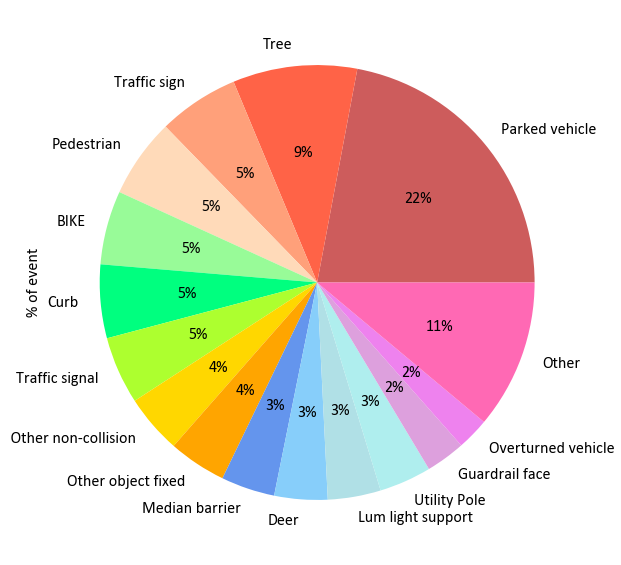

In [6]:
ACCDTYPE = df["ACCDTYPE"].value_counts()
top19_ACCDTYPE = ACCDTYPE[:15]
other_accdtype = ACCDTYPE[15:].sum()
top19_ACCDTYPE["OTHER"] = other_accdtype
color=["Indianred","tomato","lightsalmon","peachpuff","palegreen","springgreen","greenyellow","gold","orange","cornflowerblue","lightskyblue","powderblue","paleturquoise","plum","violet","hotpink"]
top19_ACCDTYPE.rename(index={"PK VEH": "Parked vehicle", "TREE":"Tree","DEER":"Deer","CURB":"Curb","FENCE":"Fence","DITCH":"Ditch","OTHER":"Other","TFSIGN": "Traffic sign","PED":"Pedestrian","TF SIG":"Traffic signal","OTH NC":" Other non-collision","OTHFX":"Other object fixed","MED B":"Median barrier","LTPOLE":"Lum light support","UTPOLE":"Utility Pole","GR FAC":"Guardrail face","OVRTRN":"Overturned vehicle","OBNFX":"Object not fixed","OT PST":"Other post"}, inplace=True)
ax1 = top19_ACCDTYPE.plot.pie(colors=color,figsize=(10,10), autopct="%d%%",label="% of event")
fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(11.5, 6.5)

In [7]:
ax1.get_figure().savefig("ACCDTYPE.eps", bbox_inches = "tight")
# Top7 are parked vehicle, tree, traffic sign, pedestrian, bicycle, crub, traffic signal 

In [8]:
import sqlite3
conn = sqlite3.connect('df.db')
df.to_sql("df", conn, if_exists="replace", index=False)

In [9]:
def qry(sql):
    return pd.read_sql(sql, conn)

In [10]:
crash = pd.read_csv("ProcessedData.csv")

d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
conn = sqlite3.connect('crash.db')
crash.to_sql("crash", conn, if_exists="replace", index=False)

In [12]:
INJ_FAT_ACCDTYPE = qry ("""
SELECT ACCDTYPE, count(Month) as "Sum", sum(TOTFATL) as "Fatality",0 as "ratio"
FROM crash 
GROUP BY ACCDTYPE
ORDER BY Fatality DESC
""")

for i in range(len(INJ_FAT_ACCDTYPE)):
    INJ_FAT_ACCDTYPE["ratio"][i]=(INJ_FAT_ACCDTYPE["Fatality"][i]/INJ_FAT_ACCDTYPE["Sum"][i])*10000

TYPE=Series({"Train":5.55,"Pedestrian":3.07 ,"Jackknife":2.77,"Overturned vehicle":1.63,"Ditch":1.39,"Tree":1.27," Guardrail end":1.03,"Utility Pole":1.01,"Guardrail face":0.83,"Bike":0.62})

d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Train                 5.55
Pedestrian            3.07
Jackknife             2.77
Overturned vehicle    1.63
Ditch                 1.39
Tree                  1.27
 Guardrail end        1.03
Utility Pole          1.01
Guardrail face        0.83
Bike                  0.62
dtype: float64


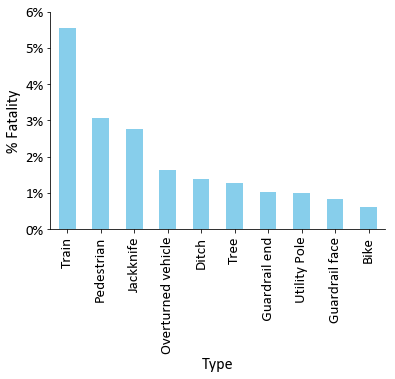

In [13]:
colors=["skyblue"]
#plt.yticks([])
ax=TYPE.plot.bar(color=colors,fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.axes.get_yaxis().set_visible(False)

import matplotlib.ticker as mtick
import numpy as np

ax.set_xlabel("Type")
ax.set_ylabel("% Fatality")

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0,7,1)
plt.yticks(my_y_ticks)
#ax.set_title("% Fatality Distributed by Type in Madison")
#ax.legend(loc=[1, 1])

fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(8.5, 6.5)
fig.savefig('TYPEF.eps', dpi=100, bbox_inches="tight")
print(TYPE)